In [1]:
import os
import warnings

warnings.filterwarnings(action='ignore', message='numpy.dtype size changed')
warnings.filterwarnings(action='ignore', message='compiletime version 3.5 of module')

if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
os.chdir(os.path.split(workbookDir)[0])

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from scipy.stats import ks_2samp
from synthesized.core import BasicSynthesizer
from synthesized.testing.synthetic_distributions import *
from synthesized.testing.synthetic_distributions import _plot_data

Copyright (C) Synthesized Ltd. - All Rights Reserved
License key: EE6B-6720-67A2-32F3-3139-2D31-322D-B531
Expires at: 2019-12-31 00:00:00

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [3]:
def log_values(synthesizer):
    print(' ', 'value types:')
    for value in synthesizer.values:
        print(' ', value.name, value)
    print()

def log_distance(df_original, df_synthesized):
    distances = list()
    for name in df_original:
        distance = ks_2samp(df_original[name], df_synthesized[name]).statistic
        suffix = ''
        if distance < 0.05:
            suffix += '*'
        if distance < 0.01:
            suffix += '*'
        distances.append('{:.3f}{}'.format(distance, suffix))
    print('/'.join(distances), end='  ')

In [4]:
size = 100000

def synthesize(df_original, num_iterations, num_logging, fn_logging=log_distance, **kwargs):
    start = time.time()
    with BasicSynthesizer(df_original, **kwargs) as synthesizer:
        log_values(synthesizer)
        value_types = {value.name: type(value) for value in synthesizer.values}
        df_synthesized = synthesizer.synthesize(n=len(df_original))
        fn_logging(df_original, df_synthesized)
        for _ in range(num_iterations // num_logging):
            synthesizer.learn(data=df_original, num_iterations=num_logging)
            df_synthesized = synthesizer.synthesize(n=len(df_original))
            assert len(df_synthesized) == len(df_original)
            fn_logging(df_original, df_synthesized)
        print()
        print(' ', 'took', time.time() - start, 's')
        return synthesizer.synthesize(n=len(df_original)), value_types

def plot(data, synthesized, value_types):
#     distances = [ks_2samp(data[col], synthesized[col])[0] for col in data.columns]
#     avg_distance = np.mean(distances)
#     evaluation[name + '_avg_distance'] = avg_distance
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
    ax1.set_title('original')
    ax2.set_title('synthesized')
    _plot_data(data, ax=ax1, value_types=value_types)
    _plot_data(synthesized, ax=ax2, value_types=value_types)

## 1. Single-column categorical

Interesting hyperparameters: entropy regularization, learning rate and decay, beta loss.

Only change between different categorical distributions: entropy regularization.

### (a) Bernoulli(0.3)

In [19]:
df_original = create_bernoulli(probability=0.3, size=size)
df_synthesized, value_types = synthesize(
    df_original=df_original, summarizer=True, num_iterations=1000, num_logging=20,
    # encoder/decoder
    network_type='mlp', capacity=512, depth=2, layer_type='dense',
    batchnorm=True, activation='relu', weight_decay=1e-3,
    # encoding
    encoding_type='variational', encoding_size=512, encoding_kwargs=dict(beta=5.0),
    # optimizer
    optimizer='adam', learning_rate=1e-5, decay_steps=200, decay_rate=0.5,
    clip_gradients=1.0, batch_size=128,
    # losses
    categorical_weight=1.0, continuous_weight=1.0,
    # categorical
    smoothing=0.0, moving_average=True, similarity_regularization=0.0,
    entropy_regularization=0.07
)

  value types:
  x categorical2-281

0.240  0.147  0.091  0.053  0.036*  0.035*  0.045*  0.023*  0.036*  0.033*  0.017*  0.022*  0.026*  0.021*  0.017*  0.017*  0.013*  0.013*  0.009**  0.008**  0.005**  0.007**  0.007**  0.008**  0.006**  0.005**  0.005**  0.004**  0.002**  0.001**  0.002**  0.004**  0.002**  0.002**  0.003**  0.001**  0.001**  0.001**  0.003**  0.001**  0.002**  0.002**  0.002**  0.002**  0.003**  0.003**  0.006**  0.006**  0.005**  0.008**  0.008**  
  took 98.81470799446106 s


### (b) Bernoulli(0.1)

In [6]:
df_original = create_bernoulli(probability=0.1, size=size)
df_synthesized, value_types = synthesize(
    df_original=df_original, summarizer=True, num_iterations=1000, num_logging=20,
    # encoder/decoder
    network_type='mlp', capacity=512, depth=2, layer_type='dense',
    batchnorm=True, activation='relu', weight_decay=1e-3,
    # encoding
    encoding_type='variational', encoding_size=512, encoding_kwargs=dict(beta=5.0),
    # optimizer
    optimizer='adam', learning_rate=1e-5, decay_steps=200, decay_rate=0.5,
    clip_gradients=1.0, batch_size=128,
    # categorical
    smoothing=0.0, moving_average=True, similarity_regularization=0.0,
    entropy_regularization=0.05
)

  value types:
  x categorical2-281

0.428  0.294  0.198  0.133  0.084  0.049*  0.031*  0.016*  0.002**  0.003**  0.004**  0.005**  0.006**  0.006**  0.009**  0.008**  0.009**  0.008**  0.006**  0.003**  0.002**  0.003**  0.002**  0.004**  0.001**  0.001**  0.000**  0.004**  0.004**  0.002**  0.003**  0.001**  0.003**  0.000**  0.001**  0.000**  0.001**  0.001**  0.001**  0.001**  0.000**  0.000**  0.002**  0.001**  0.001**  0.001**  0.000**  0.001**  0.000**  0.000**  0.000**  
  took 94.51124119758606 s


### (c) Categorical([0.5, 0.25, 0.125, ...])

In [31]:
df_original = create_categorical(probabilities=[0.5, 0.25, 0.125, 0.0625, 0.0625], size=size)
df_synthesized, value_types = synthesize(
    df_original=df_original, summarizer=True, num_iterations=1000, num_logging=20,
    # encoder/decoder
    network_type='mlp', capacity=512, depth=2, layer_type='dense',
    batchnorm=True, activation='relu', weight_decay=1e-3,
    # encoding
    encoding_type='variational', encoding_size=512, encoding_kwargs=dict(beta=5.0),
    # optimizer
    optimizer='adam', learning_rate=1e-5, decay_steps=200, decay_rate=0.5,
    clip_gradients=1.0, batch_size=128,
    # categorical
    smoothing=0.0, moving_average=True, similarity_regularization=0.0,
    entropy_regularization=0.13
)

  value types:
  x categorical5-458

0.514  0.382  0.279  0.217  0.164  0.118  0.082  0.060  0.049*  0.034*  0.027*  0.025*  0.024*  0.015*  0.005**  0.002**  0.002**  0.003**  0.010*  0.012*  0.009**  0.007**  0.008**  0.010**  0.010*  0.014*  0.017*  0.016*  0.019*  0.018*  0.019*  0.021*  0.026*  0.025*  0.025*  0.024*  0.026*  0.026*  0.028*  0.027*  0.028*  0.028*  0.028*  0.028*  0.030*  0.030*  0.030*  0.029*  0.033*  0.033*  0.031*  
  took 89.43375086784363 s


## 2. Single-column continuous

Interesting hyperparameters: learning rate and decay, beta loss

### (a) Gaussian(0, 1)

In [35]:
df_original = create_1d_gaussian(mean=0.0, std=1.0, size=size)
df_synthesized, value_types = synthesize(
    df_original=df_original, summarizer=True, num_iterations=1000, num_logging=20,
    # encoder/decoder
    network_type='mlp', capacity=512, depth=2, layer_type='dense',
    batchnorm=True, activation='relu', weight_decay=1e-3,
    # encoding
    encoding_type='variational', encoding_size=512, encoding_kwargs=dict(beta=0.0005),
    # optimizer
    optimizer='adam', learning_rate=3e-3, decay_steps=100, decay_rate=0.5,
    clip_gradients=1.0, batch_size=128
)

  value types:
  x continuous-log_normal

0.433  0.049*  0.057  0.031*  0.050*  0.044*  0.053  0.032*  0.037*  0.035*  0.050*  0.050*  0.052  0.041*  0.049*  0.040*  0.035*  0.035*  0.038*  0.037*  0.039*  0.040*  0.040*  0.041*  0.042*  0.043*  0.042*  0.042*  0.042*  0.043*  0.041*  0.042*  0.042*  0.042*  0.042*  0.041*  0.043*  0.041*  0.041*  0.041*  0.043*  0.042*  0.042*  0.042*  0.042*  0.043*  0.041*  0.041*  0.042*  0.042*  0.042*  
  took 87.26744198799133 s


### (b) Gaussian mixture N(0, 1) and N(3, 1)

Please note that fitting of distributions is not stable and for the same parameters of original distribution we can get a different fitted distribution. We actually should not fit any distribution in this case. Shouldn't we decrease threshold for distribution fitting?

In [ ]:
df_original = create_two_gaussian_mixtures(mean1=0.0, std1=1.0, mean2=3.0, std2=1.0, size=size)
df_synthesized, value_types = synthesize(
    df_original=df_original, summarizer=True, num_iterations=4000, num_logging=100,
    # encoder/decoder
    network_type='mlp', capacity=512, depth=2, layer_type='dense',
    batchnorm=True, activation='relu', weight_decay=1e-5,
    # encoding
    encoding_type='variational', encoding_size=512, encoding_kwargs=dict(beta=0.0005),
    # optimizer
    optimizer='adam', learning_rate=3e-3, decay_steps=100, decay_rate=0.5,
    clip_gradients=1.0, batch_size=128
)

  value types:
  x continuous-normal

0.447  0.086  0.078  0.077  0.067  0.088  0.110  0.088  0.082  0.090  0.087  0.071  0.085  0.065  0.077  0.061  0.028*  0.040*  0.060  0.026*  0.040*  0.023*  0.035*  0.025*  0.029*  0.026*  0.020*  0.038*  0.033*  0.028*  0.037*  0.029*  0.018*  0.020*  0.029*  0.036*  0.019*  0.022*  0.038*  0.035*  0.018*  
  took 128.4334478378296 s


#### (i) Production-like settings which sould produce reasonable result

In [ ]:
df_original = create_two_gaussian_mixtures(mean1=0.0, std1=1.0, mean2=3.0, std2=1.0, size=size)
df_synthesized, value_types = synthesize(
    df_original=df_original, summarizer=True, num_iterations=5000, num_logging=100,
    # encoder/decoder
    network_type='mlp', capacity=128, depth=2, layer_type='dense',
    batchnorm=True, activation='relu', weight_decay=1e-5, # weight_decay=1e-5
    # encoding
    encoding_type='variational', encoding_size=512, encoding_kwargs=dict(beta=0.001),
    # optimizer
    optimizer='adam', learning_rate=3e-4, decay_steps=1000, decay_rate=0.9,
    clip_gradients=1.0, batch_size=64
)

  value types:
  x continuous-normal

0.467  0.089  0.088  0.090  0.097  0.086  0.082  0.084  0.087  0.089  0.084  0.070  0.081  0.078  0.073  0.079  0.085  0.068  0.084  0.075  0.065  0.077  0.084  0.069  0.066  0.073  0.065  0.061  0.067  0.075  0.067  0.066  0.073  0.064  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13c99d208>]],
      dtype=object)

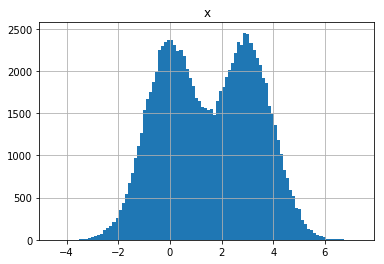

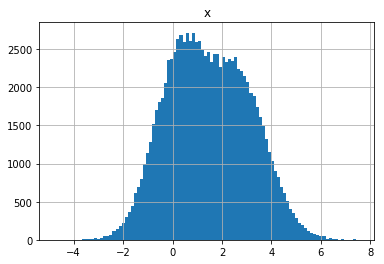

In [11]:
df_original.hist(bins=100)
df_synthesized.hist(bins=100)

## 3. Two-column product distributions

### (a) Bernoulli(0.1) x Bernoulli(0.1)

Same hyperparameters as for single-column case, but slightly increased entropy regularization value.

In [20]:
df_original = product(
    df1=create_bernoulli(probability=0.1, size=size),
    df2=create_bernoulli(probability=0.1, size=size)
)
df_synthesized, value_types = synthesize(
    df_original=df_original, summarizer=True, num_iterations=1000, num_logging=20,
    # encoder/decoder
    network_type='mlp', capacity=512, depth=2, layer_type='dense',
    batchnorm=True, activation='relu', weight_decay=1e-3,
    # encoding
    encoding_type='variational', encoding_size=512, encoding_kwargs=dict(beta=5.0),
    # optimizer
    optimizer='adam', learning_rate=1e-5, decay_steps=200, decay_rate=0.5,
    clip_gradients=1.0, batch_size=128,
    # categorical
    smoothing=0.0, moving_average=True, similarity_regularization=0.0,
    entropy_regularization=0.06
)

  value types:
  x1 categorical2-281
  x2 categorical2-281

0.564/0.025*  0.427/0.029*  0.311/0.009**  0.206/0.020*  0.132/0.033*  0.092/0.033*  0.063/0.028*  0.046*/0.027*  0.039*/0.022*  0.032*/0.015*  0.030*/0.014*  0.026*/0.006**  0.024*/0.010**  0.019*/0.011*  0.013*/0.013*  0.010*/0.013*  0.008**/0.005**  0.007**/0.003**  0.005**/0.001**  0.002**/0.000**  0.003**/0.003**  0.006**/0.001**  0.005**/0.003**  0.004**/0.004**  0.004**/0.005**  0.004**/0.005**  0.004**/0.006**  0.007**/0.005**  0.008**/0.008**  0.008**/0.007**  0.009**/0.010**  0.011*/0.010**  0.010*/0.009**  0.012*/0.006**  0.014*/0.007**  0.014*/0.009**  0.014*/0.011*  0.014*/0.010**  0.014*/0.011*  0.014*/0.011*  0.013*/0.013*  0.013*/0.011*  0.014*/0.010*  0.015*/0.011*  0.013*/0.014*  0.013*/0.011*  0.015*/0.011*  0.015*/0.014*  0.015*/0.012*  0.015*/0.013*  0.016*/0.014*  
  took 108.48408484458923 s


### (b) Gaussian(1, 1) x Gaussian(-1, 1)

In [13]:
df_original = product(
    df1=create_1d_gaussian(mean=1.0, std=1.0, size=size),
    df2=create_1d_gaussian(mean=-1.0, std=1.0, size=size)
)
df_synthesized, value_types = synthesize(
    df_original=df_original, summarizer=True, num_iterations=1000, num_logging=20,
    # encoder/decoder
    network_type='mlp', capacity=512, depth=2, layer_type='dense',
    batchnorm=True, activation='relu', weight_decay=1e-3,
    # encoding
    encoding_type='variational', encoding_size=512, encoding_kwargs=dict(beta=0.0004),
    # optimizer
    optimizer='adam', learning_rate=3e-3, decay_steps=50, decay_rate=0.5,
    clip_gradients=1.0, batch_size=128
)

  value types:
  x1 continuous-weibull
  x2 continuous-weibull

0.412/0.416  

/Users/alexkuhnle/PycharmProjects/synthesized/venv/lib/python3.7/site-packages/pandas/core/indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/Users/alexkuhnle/PycharmProjects/synthesized/venv/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0.086/0.062  0.060/0.051  0.042*/0.029*  0.045*/0.039*  0.057/0.048*  0.024*/0.059  0.052/0.043*  0.030*/0.052  0.053/0.057  0.043*/0.039*  0.052/0.040*  0.043*/0.058  0.038*/0.043*  0.047*/0.041*  0.044*/0.041*  0.040*/0.046*  0.042*/0.045*  0.046*/0.044*  0.042*/0.042*  0.042*/0.041*  0.042*/0.041*  0.041*/0.041*  0.040*/0.039*  0.043*/0.038*  0.043*/0.040*  0.042*/0.040*  0.045*/0.041*  0.042*/0.040*  0.042*/0.040*  0.042*/0.041*  0.042*/0.040*  0.042*/0.041*  0.041*/0.040*  0.042*/0.040*  0.042*/0.040*  0.042*/0.039*  0.044*/0.039*  0.042*/0.039*  0.041*/0.040*  0.042*/0.040*  0.042*/0.040*  0.042*/0.040*  0.041*/0.040*  0.041*/0.039*  0.042*/0.039*  0.043*/0.040*  0.042*/0.040*  0.042*/0.039*  0.042*/0.040*  0.043*/0.040*  
  took 116.64546704292297 s


### (c) Bernoulli x Gaussian

#### (i) Uniform loss weights

In [14]:
df_original = product(
    df1=create_bernoulli(probability=0.1, size=size),
    df2=create_1d_gaussian(mean=0.0, std=1.0, size=size)
)
df_synthesized, value_types = synthesize(
    df_original=df_original, summarizer=True, num_iterations=1000, num_logging=20,
    # encoder/decoder
    network_type='mlp', capacity=512, depth=2, layer_type='dense',
    batchnorm=True, activation='relu', weight_decay=1e-3,
    # encoding
    encoding_type='variational', encoding_size=512, encoding_kwargs=dict(beta=5.0),
    # optimizer
    optimizer='adam', learning_rate=1e-5, decay_steps=200, decay_rate=0.5,
    clip_gradients=1.0, batch_size=128,
    # losses
    categorical_weight=1.0, continuous_weight=1.0,
    # categorical
    smoothing=0.0, moving_average=True, similarity_regularization=0.0,
    entropy_regularization=0.05
)

  value types:
  x1 categorical2-281
  x2 continuous-normal

0.291/0.418  0.172/0.418  0.092/0.416  0.049*/0.414  0.024*/0.412  0.006**/0.412  0.000**/0.411  0.005**/0.412  0.011*/0.412  0.012*/0.412  0.014*/0.413  0.016*/0.413  0.019*/0.413  0.019*/0.414  0.021*/0.413  0.023*/0.412  0.023*/0.412  0.025*/0.412  0.025*/0.413  0.027*/0.411  0.026*/0.411  0.027*/0.411  0.028*/0.412  0.028*/0.412  0.029*/0.412  0.030*/0.412  0.031*/0.412  0.031*/0.413  0.031*/0.413  0.032*/0.412  0.032*/0.413  0.031*/0.413  0.032*/0.412  0.031*/0.412  0.032*/0.413  0.031*/0.412  0.031*/0.413  0.032*/0.412  0.032*/0.413  0.031*/0.413  0.032*/0.413  0.032*/0.413  0.032*/0.413  0.034*/0.413  0.033*/0.413  0.034*/0.413  0.034*/0.412  0.034*/0.413  0.034*/0.412  0.035*/0.413  0.034*/0.413  
  took 103.7576470375061 s


#### (ii) Biased loss weights

In [16]:
df_original = product(
    df1=create_bernoulli(probability=0.1, size=size),
    df2=create_1d_gaussian(mean=0.0, std=1.0, size=size)
)
df_synthesized, value_types = synthesize(
    df_original=df_original, summarizer=True, num_iterations=1000, num_logging=20,
    # encoder/decoder
    network_type='mlp', capacity=512, depth=2, layer_type='dense',
    batchnorm=True, activation='relu', weight_decay=1e-3,
    # encoding
    encoding_type='variational', encoding_size=512, encoding_kwargs=dict(beta=5.0),
    # optimizer
    optimizer='adam', learning_rate=1e-5, decay_steps=200, decay_rate=0.5,
    clip_gradients=1.0, batch_size=128,
    # losses
    categorical_weight=1.0, continuous_weight=7000.0,
    # categorical
    smoothing=0.0, moving_average=True, similarity_regularization=0.0,
    entropy_regularization=0.05
)

  value types:
  x1 categorical2-281
  x2 continuous-log_normal

0.393/0.442  0.256/0.434  0.160/0.419  0.094/0.400  0.057/0.378  0.031*/0.356  0.020*/0.333  0.013*/0.316  0.010*/0.300  0.008**/0.287  0.005**/0.275  0.008**/0.265  0.006**/0.256  0.007**/0.249  0.006**/0.242  0.003**/0.236  0.003**/0.231  0.005**/0.227  0.004**/0.225  0.002**/0.223  0.003**/0.221  0.002**/0.218  0.001**/0.216  0.002**/0.215  0.002**/0.213  0.003**/0.212  0.003**/0.211  0.004**/0.210  0.004**/0.208  0.005**/0.207  0.004**/0.205  0.004**/0.205  0.004**/0.205  0.006**/0.204  0.004**/0.203  0.005**/0.203  0.003**/0.203  0.005**/0.202  0.003**/0.202  0.003**/0.201  0.003**/0.199  0.003**/0.201  0.004**/0.199  0.004**/0.200  0.005**/0.200  0.004**/0.198  0.003**/0.199  0.004**/0.199  0.004**/0.198  0.004**/0.198  0.002**/0.197  
  took 101.09803986549377 s
